In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Constants
kB = 1.380e-23
e = 1.602e-19

# Functions
def H(psi, h_dd, h_uu, h_ud, mud, muu):
    return psi*mud + (1-psi)*muu + 0.5*(h_dd*psi**2 + h_uu*(1-psi)**2 + 2*h_ud*(1-psi)*psi)

def TS(psi, T):
    return -kB*(psi*np.log(psi) + (1-psi)*np.log(1-psi))*T/e*1000

def G(psi, T, h_dd, h_uu, h_ud, mud, muu):
    return H(psi, h_dd, h_uu, h_ud, mud, muu) - TS(psi, T)

def lambda_value(h_dd, h_uu, h_ud, T, psi_lambda):
    value = (h_dd + h_uu - 2*h_ud)/(kB*T/e*1000) * psi_lambda*(psi_lambda-1)
    value_rn = np.round(value, 8)
    return value_rn

# Simulation parameters
T_range = np.linspace(200, 500, 1000)  # Temperature range
h_ud_range = np.linspace(-50, 250, 1000)  # hud range
h_dd = h_uu = 0  # Fixed for simplicity
mud = muu = 0  # Fixed for simplicity

# Data collection
lambda_vals = []
psi_min_vals = []
T_vals = []
h_ud_vals = []

for T in T_range:
    for h_ud in h_ud_range:
        lambda_val = lambda_value(h_dd, h_uu, h_ud, T, 0.5)
        psi_range = np.linspace(0.01, 0.99, 10000)
        G_vals = G(psi_range, T, h_dd, h_uu, h_ud, mud, muu)
        
        # Find minima of G (simplified approach)
        min_indices = np.argwhere(np.diff(np.sign(np.diff(G_vals))) > 0).flatten()
        for index in min_indices:
            lambda_vals.append(lambda_val)
            psi_min_vals.append(psi_range[index])
            T_vals.append(T)
            h_ud_vals.append(h_ud)

# Create DataFrame
df = pd.DataFrame({
    'Temperature': T_vals,
    'h_ud': h_ud_vals,
    'lambda': lambda_vals,
    'psi_min': psi_min_vals
})

# Save DataFrame to CSV
df.to_csv('bifurcation_data.csv', index=False)

#print("Data generation complete. Saved to 'bifurcation_data.csv'.")

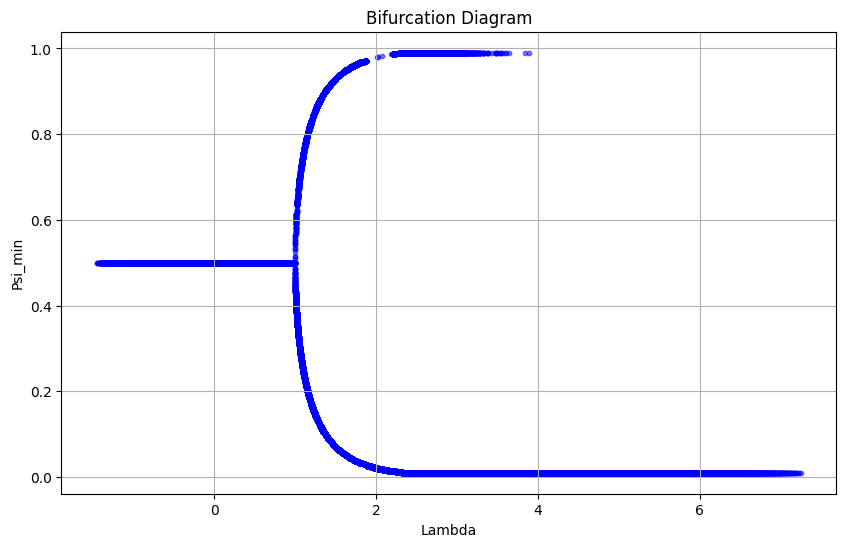

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('bifurcation_data.csv')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['lambda'], df['psi_min'], s=10, c='blue', alpha=0.5)
plt.title('Bifurcation Diagram')
plt.xlabel('Lambda')
plt.ylabel('Psi_min')
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import pandas as pd
#from scipy.optimize import minimize_scalar

# Constants
kB = 1.380e-23
e = 1.602e-19

h_dd = h_uu = 0  # Fixed for simplicity
mud = muu = 0  # Fixed for simplicity

# Data collection
lambda_vals = []
psi_min_vals = []
T_vals = []
h_ud_vals = []

# Vectorized functions
def H(psi, h_dd, h_uu, h_ud, mud, muu):
    return psi*mud + (1-psi)*muu + 0.5*(h_dd*psi**2 + h_uu*(1-psi)**2 + 2*h_ud*(1-psi)*psi)

def TS(psi, T):
    return -kB*(psi*np.log(psi) + (1-psi)*np.log(1-psi))*T/e*1000

def G(psi, T, h_dd, h_uu, h_ud, mud, muu):
    return H(psi, h_dd, h_uu, h_ud, mud, muu) - TS(psi, T)

def lambda_value(h_dd, h_uu, h_ud, T, psi_lambda):
    value = (h_dd + h_uu - 2*h_ud)/(kB*T/e*1000) * psi_lambda*(psi_lambda-1)
    return np.round(value, 8)

# Simulation parameters (Consider adjusting these for speed vs. accuracy trade-off)
T_range = np.linspace(200, 500, 1000)  # Reduced number of points for faster computation
h_ud_range = np.linspace(-50, 250, 1000)

# Data collection
results = []

# Example of parallel processing setup (pseudo-code, replace with actual parallel processing code)
# from joblib import Parallel, delayed
# def process(T, h_ud):
#     lambda_val = lambda_value(h_dd, h_uu, h_ud, T, 0.5)
#     psi_range = np.linspace(0.01, 0.99, 1000)  # Consider adjusting for speed
#     G_vals = G(psi_range, T, h_dd, h_uu, h_ud, mud, muu)
#     min_index = np.argmin(G_vals)  # Simplified minima finding
#     return T, h_ud, lambda_val, psi_range[min_index]

# results = Parallel(n_jobs=-1)(delayed(process)(T, h_ud) for T in T_range for h_ud in h_ud_range)

# Assuming sequential processing for demonstration
for T in T_range:
    for h_ud in h_ud_range:
        lambda_val = lambda_value(h_dd, h_uu, h_ud, T, 0.5)
        if -0.5 < lambda_val < 2.5:
            psi_range = np.linspace(0.00001, 0.99999, 100000)  # Consider adjusting for speed
            G_vals = G(psi_range, T, h_dd, h_uu, h_ud, mud, muu)
            min_index = np.argmin(G_vals)  # Simplified minima finding
            results.append((T, h_ud, lambda_val, psi_range[min_index]))

# Convert results to DataFrame
df = pd.DataFrame(results, columns=['Temperature', 'h_ud', 'lambda', 'psi_min'])

# Save DataFrame to CSV
df.to_csv('bifurcation_data.csv', index=False)

KeyboardInterrupt: 

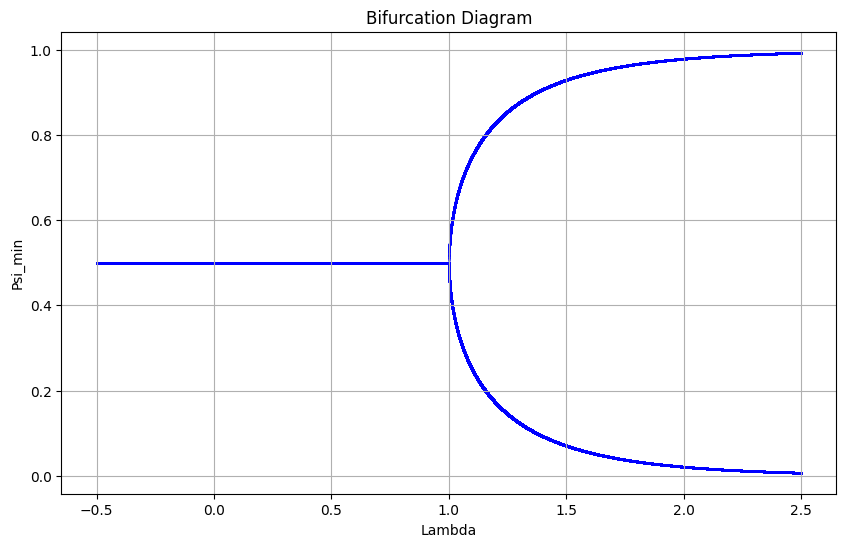

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('bifurcation_data.csv')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['lambda'], df['psi_min'], s=0.5, c='blue', alpha=0.5)
plt.title('Bifurcation Diagram')
plt.xlabel('Lambda')
plt.ylabel('Psi_min')
plt.grid(True)
plt.show()
